https://blog.paperspace.com/projects-with-reinforcement-learning/
https://github.com/openai/gym/blob/master/gym/envs/box2d/car_racing.py
1. The OpenAI gym to create our environments
2. stable baselines to import our policy, vectorize the environment, and evaluate the policy.

In [1]:
import gym 
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import os
from stable_baselines3.common.callbacks import BaseCallback
# Import Frame Stacker Wrapper and Grayscaling Wrapper
from gym.wrappers import FrameStack, GrayScaleObservation
# Import Matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
gym.logger.set_level(40)

### Testing the environment
<p>The reward is -0.1 every frame and +1000/N for every track tile visited, where N is the total number of tiles visited in the track. For example, if you have finished in 732 frames, your reward is 1000 - 0.1*732 = 926.8 points.(from https://www.gymlibrary.dev/environments/box2d/car_racing/) The game is considered to be solved when the agent consistently gets 900+ points.</p>
<p>test the required environment for the self-driving car.</p>

In [4]:
env = gym.make("CarRacing-v0")

In [5]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    
env.close()

Track generation: 1156..1449 -> 293-tiles track
Episode:1 Score:-31.50684931506895
Track generation: 1164..1459 -> 295-tiles track
Episode:2 Score:-31.972789115646712
Track generation: 1159..1454 -> 295-tiles track
Episode:3 Score:-35.37414965986448
Track generation: 1167..1463 -> 296-tiles track
Episode:4 Score:-35.59322033898359
Track generation: 1294..1631 -> 337-tiles track
Episode:5 Score:-43.45238095238162


In [ ]:
env.action_space # continuous 3 actions

### the Proximal Policy Optimization Reinforcement Learning Algorithm
want loss goes down, explained_variance goes up

In [6]:
class TrainAndLoggingCallback(BaseCallback) :

    def __init__(self, check_freq, save_path, verbose=1) :
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self) :
        if self.save_path is not None :
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) :
        if self.n_calls % self.check_freq == 0 :
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [10]:
log_path = os.path.join('Training', 'Log5s')  
callback = TrainAndLoggingCallback(check_freq=10000,save_path=log_path)

In [11]:
model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


In [12]:
model.learn(total_timesteps=1000000, callback=callback) 

Track generation: 1196..1499 -> 303-tiles track
Logging to Training\Log5s\PPO_1
Track generation: 1076..1349 -> 273-tiles track
Track generation: 1084..1359 -> 275-tiles track
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -54.4    |
| time/              |          |
|    fps             | 154      |
|    iterations      | 1        |
|    time_elapsed    | 13       |
|    total_timesteps | 2048     |
---------------------------------
Track generation: 1171..1468 -> 297-tiles track
Track generation: 1176..1474 -> 298-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -50.8      |
| time/                   |            |
|    fps                  | 89         |
|    iterations           | 2          |
|    time_elapsed         | 45         |
|    total_timesteps      | 4096       |
| train/           

Track generation: 1159..1453 -> 294-tiles track
Track generation: 1207..1513 -> 306-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -47         |
| time/                   |             |
|    fps                  | 60          |
|    iterations           | 10          |
|    time_elapsed         | 339         |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.018243045 |
|    clip_fraction        | 0.205       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.01       |
|    explained_variance   | 0.219       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0722      |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0262     |
|    std                  | 0.914       |
|    value_loss           | 0.391       |
----------------------

Track generation: 1240..1554 -> 314-tiles track
Track generation: 1173..1470 -> 297-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -39        |
| time/                   |            |
|    fps                  | 59         |
|    iterations           | 18         |
|    time_elapsed         | 623        |
|    total_timesteps      | 36864      |
| train/                  |            |
|    approx_kl            | 0.03974265 |
|    clip_fraction        | 0.276      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.67      |
|    explained_variance   | 0.885      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0225     |
|    n_updates            | 170        |
|    policy_gradient_loss | -0.0353    |
|    std                  | 0.815      |
|    value_loss           | 0.202      |
----------------------------------------
Tr

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | -28.7      |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 26         |
|    time_elapsed         | 910        |
|    total_timesteps      | 53248      |
| train/                  |            |
|    approx_kl            | 0.04952806 |
|    clip_fraction        | 0.311      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.32      |
|    explained_variance   | 0.965      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.0149     |
|    n_updates            | 250        |
|    policy_gradient_loss | -0.0419    |
|    std                  | 0.726      |
|    value_loss           | 0.426      |
----------------------------------------
Track generation: 1204..1509 -> 305-tiles track
Track generation: 993..1248 -> 255-tiles track
ret

Track generation: 1026..1293 -> 267-tiles track
Track generation: 1249..1565 -> 316-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -5.13       |
| time/                   |             |
|    fps                  | 58          |
|    iterations           | 34          |
|    time_elapsed         | 1183        |
|    total_timesteps      | 69632       |
| train/                  |             |
|    approx_kl            | 0.047095224 |
|    clip_fraction        | 0.359       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.99       |
|    explained_variance   | 0.929       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.143       |
|    n_updates            | 330         |
|    policy_gradient_loss | -0.0299     |
|    std                  | 0.654       |
|    value_loss           | 0.912       |
----------------------

Track generation: 1215..1523 -> 308-tiles track
Track generation: 1216..1524 -> 308-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 44.8       |
| time/                   |            |
|    fps                  | 58         |
|    iterations           | 42         |
|    time_elapsed         | 1470       |
|    total_timesteps      | 86016      |
| train/                  |            |
|    approx_kl            | 0.10180007 |
|    clip_fraction        | 0.479      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.73      |
|    explained_variance   | 0.692      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.21       |
|    n_updates            | 410        |
|    policy_gradient_loss | -0.0339    |
|    std                  | 0.602      |
|    value_loss           | 2.94       |
----------------------------------------
Tr

Track generation: 1053..1320 -> 267-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 95.4       |
| time/                   |            |
|    fps                  | 57         |
|    iterations           | 50         |
|    time_elapsed         | 1779       |
|    total_timesteps      | 102400     |
| train/                  |            |
|    approx_kl            | 0.05033133 |
|    clip_fraction        | 0.415      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.58      |
|    explained_variance   | 0.746      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.537      |
|    n_updates            | 490        |
|    policy_gradient_loss | -0.011     |
|    std                  | 0.574      |
|    value_loss           | 2.12       |
----------------------------------------
Track generation: 1289..1615 -> 326-tiles track
Tr

Track generation: 1170..1467 -> 297-tiles track
Track generation: 1035..1298 -> 263-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | 174         |
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 58          |
|    time_elapsed         | 2140        |
|    total_timesteps      | 118784      |
| train/                  |             |
|    approx_kl            | 0.100682676 |
|    clip_fraction        | 0.462       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.46       |
|    explained_variance   | 0.795       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.73        |
|    n_updates            | 570         |
|    policy_gradient_loss | -0.0222     |
|    std                  | 0.556       |
|    value_loss           | 4           |
----------------------

Track generation: 1151..1444 -> 293-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 278        |
| time/                   |            |
|    fps                  | 52         |
|    iterations           | 66         |
|    time_elapsed         | 2562       |
|    total_timesteps      | 135168     |
| train/                  |            |
|    approx_kl            | 0.06848372 |
|    clip_fraction        | 0.493      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.44      |
|    explained_variance   | 0.729      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.691      |
|    n_updates            | 650        |
|    policy_gradient_loss | -0.00992   |
|    std                  | 0.55       |
|    value_loss           | 4.44       |
----------------------------------------
Track generation: 999..1253 -> 254-tiles track
Tra

Track generation: 1178..1476 -> 298-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 376        |
| time/                   |            |
|    fps                  | 50         |
|    iterations           | 74         |
|    time_elapsed         | 2991       |
|    total_timesteps      | 151552     |
| train/                  |            |
|    approx_kl            | 0.09992218 |
|    clip_fraction        | 0.476      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.38      |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.476      |
|    n_updates            | 730        |
|    policy_gradient_loss | -0.00687   |
|    std                  | 0.542      |
|    value_loss           | 4.6        |
----------------------------------------
Track generation: 1156..1449 -> 293-tiles track
Tr

Track generation: 1132..1419 -> 287-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 469        |
| time/                   |            |
|    fps                  | 49         |
|    iterations           | 82         |
|    time_elapsed         | 3416       |
|    total_timesteps      | 167936     |
| train/                  |            |
|    approx_kl            | 0.08878365 |
|    clip_fraction        | 0.502      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.41      |
|    explained_variance   | 0.948      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.816      |
|    n_updates            | 810        |
|    policy_gradient_loss | 0.0178     |
|    std                  | 0.552      |
|    value_loss           | 4.42       |
----------------------------------------
Track generation: 1044..1309 -> 265-tiles track
Tr

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1e+03      |
|    ep_rew_mean          | 541        |
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 90         |
|    time_elapsed         | 3844       |
|    total_timesteps      | 184320     |
| train/                  |            |
|    approx_kl            | 0.07719882 |
|    clip_fraction        | 0.485      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.37      |
|    explained_variance   | 0.939      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.13       |
|    n_updates            | 890        |
|    policy_gradient_loss | 0.0237     |
|    std                  | 0.542      |
|    value_loss           | 5.68       |
----------------------------------------
Track generation: 1188..1471 -> 283-tiles track
retry to generate track (normal if there are not m

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 997       |
|    ep_rew_mean          | 535       |
| time/                   |           |
|    fps                  | 47        |
|    iterations           | 98        |
|    time_elapsed         | 4256      |
|    total_timesteps      | 200704    |
| train/                  |           |
|    approx_kl            | 0.1411645 |
|    clip_fraction        | 0.535     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.34     |
|    explained_variance   | 0.892     |
|    learning_rate        | 0.0003    |
|    loss                 | 3.2       |
|    n_updates            | 970       |
|    policy_gradient_loss | 0.0159    |
|    std                  | 0.538     |
|    value_loss           | 20.4      |
---------------------------------------
Track generation: 1123..1415 -> 292-tiles track
Track generation: 1284..1609 -> 325-tiles track
Track generation: 1084..

Track generation: 1124..1409 -> 285-tiles track
Track generation: 1141..1439 -> 298-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 997        |
|    ep_rew_mean          | 540        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 107        |
|    time_elapsed         | 4725       |
|    total_timesteps      | 219136     |
| train/                  |            |
|    approx_kl            | 0.13127548 |
|    clip_fraction        | 0.491      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.35      |
|    explained_variance   | 0.951      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.11       |
|    n_updates            | 1060       |
|    policy_gradient_loss | 0.00891    |
|    std                  | 0.542      |
|    value_loss           | 9.23       |
----------------------------------------
Tr

Track generation: 1210..1517 -> 307-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 997        |
|    ep_rew_mean          | 515        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 115        |
|    time_elapsed         | 5150       |
|    total_timesteps      | 235520     |
| train/                  |            |
|    approx_kl            | 0.12319434 |
|    clip_fraction        | 0.46       |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.34      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.754      |
|    n_updates            | 1140       |
|    policy_gradient_loss | 0.011      |
|    std                  | 0.536      |
|    value_loss           | 6.33       |
----------------------------------------
Track generation: 1149..1440 -> 291-tiles track
Tr

Track generation: 1109..1398 -> 289-tiles track
Track generation: 1014..1272 -> 258-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 997        |
|    ep_rew_mean          | 500        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 123        |
|    time_elapsed         | 5517       |
|    total_timesteps      | 251904     |
| train/                  |            |
|    approx_kl            | 0.22409454 |
|    clip_fraction        | 0.574      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.34      |
|    explained_variance   | 0.889      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.44       |
|    n_updates            | 1220       |
|    policy_gradient_loss | 0.0151     |
|    std                  | 0.54       |
|    value_loss           | 7.95       |
----------------------------------------
Tr

Track generation: 1124..1416 -> 292-tiles track
Track generation: 1126..1412 -> 286-tiles track
Track generation: 1148..1439 -> 291-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 980        |
|    ep_rew_mean          | 453        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 131        |
|    time_elapsed         | 5878       |
|    total_timesteps      | 268288     |
| train/                  |            |
|    approx_kl            | 0.17104837 |
|    clip_fraction        | 0.532      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.41      |
|    explained_variance   | 0.942      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.17       |
|    n_updates            | 1300       |
|    policy_gradient_loss | 0.0222     |
|    std                  | 0.554      |
|    value_loss           | 9.45    

Track generation: 1286..1612 -> 326-tiles track
Track generation: 1148..1439 -> 291-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 975        |
|    ep_rew_mean          | 466        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 139        |
|    time_elapsed         | 6279       |
|    total_timesteps      | 284672     |
| train/                  |            |
|    approx_kl            | 0.16338046 |
|    clip_fraction        | 0.543      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.52      |
|    explained_variance   | 0.875      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.52       |
|    n_updates            | 1380       |
|    policy_gradient_loss | 0.017      |
|    std                  | 0.575      |
|    value_loss           | 12.5       |
----------------------------------------
Tr

Track generation: 1153..1445 -> 292-tiles track
Track generation: 1318..1652 -> 334-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 497         |
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 148         |
|    time_elapsed         | 6738        |
|    total_timesteps      | 303104      |
| train/                  |             |
|    approx_kl            | 0.098193556 |
|    clip_fraction        | 0.482       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.61       |
|    explained_variance   | 0.94        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.57        |
|    n_updates            | 1470        |
|    policy_gradient_loss | 0.00707     |
|    std                  | 0.59        |
|    value_loss           | 11.2        |
----------------------

Track generation: 1203..1508 -> 305-tiles track
Track generation: 1200..1504 -> 304-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 502         |
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 156         |
|    time_elapsed         | 7149        |
|    total_timesteps      | 319488      |
| train/                  |             |
|    approx_kl            | 0.097579725 |
|    clip_fraction        | 0.479       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.64       |
|    explained_variance   | 0.966       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.985       |
|    n_updates            | 1550        |
|    policy_gradient_loss | 0.00246     |
|    std                  | 0.596       |
|    value_loss           | 6.1         |
----------------------

Track generation: 1111..1393 -> 282-tiles track
Track generation: 1304..1634 -> 330-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 978         |
|    ep_rew_mean          | 526         |
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 164         |
|    time_elapsed         | 7553        |
|    total_timesteps      | 335872      |
| train/                  |             |
|    approx_kl            | 0.106706806 |
|    clip_fraction        | 0.561       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.68       |
|    explained_variance   | 0.936       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.39        |
|    n_updates            | 1630        |
|    policy_gradient_loss | 0.0368      |
|    std                  | 0.607       |
|    value_loss           | 11.6        |
----------------------

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 971        |
|    ep_rew_mean          | 528        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 172        |
|    time_elapsed         | 7968       |
|    total_timesteps      | 352256     |
| train/                  |            |
|    approx_kl            | 0.12277675 |
|    clip_fraction        | 0.564      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.67      |
|    explained_variance   | 0.892      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.636      |
|    n_updates            | 1710       |
|    policy_gradient_loss | 0.0178     |
|    std                  | 0.609      |
|    value_loss           | 8.59       |
----------------------------------------
Track generation: 1066..1341 -> 275-tiles track
retry to generate track (normal if there are not m

Track generation: 1192..1494 -> 302-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 984        |
|    ep_rew_mean          | 563        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 180        |
|    time_elapsed         | 8378       |
|    total_timesteps      | 368640     |
| train/                  |            |
|    approx_kl            | 0.17472613 |
|    clip_fraction        | 0.565      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.72      |
|    explained_variance   | 0.925      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.74       |
|    n_updates            | 1790       |
|    policy_gradient_loss | -0.000769  |
|    std                  | 0.616      |
|    value_loss           | 11.5       |
----------------------------------------
Track generation: 1182..1482 -> 300-tiles track
Tr

Track generation: 1069..1341 -> 272-tiles track
Track generation: 1207..1513 -> 306-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 989        |
|    ep_rew_mean          | 563        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 188        |
|    time_elapsed         | 8784       |
|    total_timesteps      | 385024     |
| train/                  |            |
|    approx_kl            | 0.09093341 |
|    clip_fraction        | 0.57       |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.73      |
|    explained_variance   | 0.817      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.37       |
|    n_updates            | 1870       |
|    policy_gradient_loss | 0.0443     |
|    std                  | 0.615      |
|    value_loss           | 14.1       |
----------------------------------------
Tr

Track generation: 1183..1483 -> 300-tiles track
Track generation: 1032..1299 -> 267-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 986        |
|    ep_rew_mean          | 599        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 196        |
|    time_elapsed         | 9203       |
|    total_timesteps      | 401408     |
| train/                  |            |
|    approx_kl            | 0.14971477 |
|    clip_fraction        | 0.524      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.71      |
|    explained_variance   | 0.878      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.779      |
|    n_updates            | 1950       |
|    policy_gradient_loss | -0.00157   |
|    std                  | 0.609      |
|    value_loss           | 5.44       |
----------------------------------------
Tr

Track generation: 1120..1404 -> 284-tiles track
Track generation: 1012..1275 -> 263-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 976       |
|    ep_rew_mean          | 622       |
| time/                   |           |
|    fps                  | 43        |
|    iterations           | 204       |
|    time_elapsed         | 9617      |
|    total_timesteps      | 417792    |
| train/                  |           |
|    approx_kl            | 0.2672196 |
|    clip_fraction        | 0.557     |
|    clip_range           | 0.2       |
|    entropy_loss         | -2.69     |
|    explained_variance   | 0.947     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.448     |
|    n_updates            | 2030      |
|    policy_gradient_loss | 0.015     |
|    std                  | 0.611     |
|    value_loss           | 7.89      |
---------------------------------------
Track generation: 1260..

Track generation: 1204..1509 -> 305-tiles track
Track generation: 1100..1380 -> 280-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 973        |
|    ep_rew_mean          | 645        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 213        |
|    time_elapsed         | 10042      |
|    total_timesteps      | 436224     |
| train/                  |            |
|    approx_kl            | 0.13657624 |
|    clip_fraction        | 0.559      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.73      |
|    explained_variance   | 0.89       |
|    learning_rate        | 0.0003     |
|    loss                 | 1.81       |
|    n_updates            | 2120       |
|    policy_gradient_loss | 0.0127     |
|    std                  | 0.613      |
|    value_loss           | 7.22       |
----------------------------------------
Tr

Track generation: 1353..1695 -> 342-tiles track
Track generation: 1132..1419 -> 287-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 974        |
|    ep_rew_mean          | 691        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 221        |
|    time_elapsed         | 10378      |
|    total_timesteps      | 452608     |
| train/                  |            |
|    approx_kl            | 0.15742233 |
|    clip_fraction        | 0.568      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.72      |
|    explained_variance   | 0.843      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.755      |
|    n_updates            | 2200       |
|    policy_gradient_loss | 0.0175     |
|    std                  | 0.613      |
|    value_loss           | 9.41       |
----------------------------------------
Tr

Track generation: 1200..1504 -> 304-tiles track
Track generation: 1028..1293 -> 265-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1136..1424 -> 288-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 973        |
|    ep_rew_mean          | 657        |
| time/                   |            |
|    fps                  | 43         |
|    iterations           | 229        |
|    time_elapsed         | 10676      |
|    total_timesteps      | 468992     |
| train/                  |            |
|    approx_kl            | 0.12765574 |
|    clip_fraction        | 0.571      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.76      |
|    explained_variance   | 0.932      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.64       |
|    n_updates            | 2280       |
|    policy_gradient_loss | 0.0184    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 968        |
|    ep_rew_mean          | 646        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 237        |
|    time_elapsed         | 11006      |
|    total_timesteps      | 485376     |
| train/                  |            |
|    approx_kl            | 0.11096109 |
|    clip_fraction        | 0.509      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.88      |
|    explained_variance   | 0.98       |
|    learning_rate        | 0.0003     |
|    loss                 | 0.412      |
|    n_updates            | 2360       |
|    policy_gradient_loss | 0.0143     |
|    std                  | 0.646      |
|    value_loss           | 5.55       |
----------------------------------------
Track generation: 1258..1584 -> 326-tiles track
Track generation: 1038..1302 -> 264-tiles track
--

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 969        |
|    ep_rew_mean          | 603        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 245        |
|    time_elapsed         | 11337      |
|    total_timesteps      | 501760     |
| train/                  |            |
|    approx_kl            | 0.20536873 |
|    clip_fraction        | 0.527      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.91      |
|    explained_variance   | 0.972      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.83       |
|    n_updates            | 2440       |
|    policy_gradient_loss | 0.0102     |
|    std                  | 0.65       |
|    value_loss           | 9.94       |
----------------------------------------
Track generation: 1255..1573 -> 318-tiles track
Track generation: 1183..1483 -> 300-tiles track
Tr

Track generation: 1155..1448 -> 293-tiles track
Track generation: 1167..1463 -> 296-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 978        |
|    ep_rew_mean          | 536        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 254        |
|    time_elapsed         | 11684      |
|    total_timesteps      | 520192     |
| train/                  |            |
|    approx_kl            | 0.16841182 |
|    clip_fraction        | 0.501      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.08      |
|    explained_variance   | 0.964      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.434      |
|    n_updates            | 2530       |
|    policy_gradient_loss | 0.0124     |
|    std                  | 0.685      |
|    value_loss           | 5.18       |
----------------------------------------
Tr

Track generation: 1219..1528 -> 309-tiles track
Track generation: 1205..1511 -> 306-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 980        |
|    ep_rew_mean          | 467        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 263        |
|    time_elapsed         | 12056      |
|    total_timesteps      | 538624     |
| train/                  |            |
|    approx_kl            | 0.27238607 |
|    clip_fraction        | 0.566      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.2       |
|    explained_variance   | 0.962      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.506      |
|    n_updates            | 2620       |
|    policy_gradient_loss | 0.0448     |
|    std                  | 0.719      |
|    value_loss           | 9.69       |
----------------------------------------
Tr

Track generation: 1157..1458 -> 301-tiles track
Track generation: 1083..1358 -> 275-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 988        |
|    ep_rew_mean          | 424        |
| time/                   |            |
|    fps                  | 44         |
|    iterations           | 271        |
|    time_elapsed         | 12414      |
|    total_timesteps      | 555008     |
| train/                  |            |
|    approx_kl            | 0.13348514 |
|    clip_fraction        | 0.473      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.28      |
|    explained_variance   | 0.978      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.316      |
|    n_updates            | 2700       |
|    policy_gradient_loss | -0.00558   |
|    std                  | 0.727      |
|    value_loss           | 3.42       |
----------------------------------------
Tr

Track generation: 1212..1519 -> 307-tiles track
Track generation: 1151..1443 -> 292-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 989         |
|    ep_rew_mean          | 372         |
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 279         |
|    time_elapsed         | 12725       |
|    total_timesteps      | 571392      |
| train/                  |             |
|    approx_kl            | 0.063509546 |
|    clip_fraction        | 0.391       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.14       |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.257       |
|    n_updates            | 2780        |
|    policy_gradient_loss | -0.0134     |
|    std                  | 0.692       |
|    value_loss           | 1.54        |
----------------------

Track generation: 1208..1514 -> 306-tiles track
Track generation: 1082..1365 -> 283-tiles track
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 998         |
|    ep_rew_mean          | 338         |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 288         |
|    time_elapsed         | 13105       |
|    total_timesteps      | 589824      |
| train/                  |             |
|    approx_kl            | 0.123084344 |
|    clip_fraction        | 0.53        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.89       |
|    explained_variance   | 0.671       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.288       |
|    n_updates            | 2870        |
|    policy_gradient_loss | -0.00602    |
|    std                  | 0.648       |
|    value_loss           | 2.93        |
----------------------

Track generation: 1132..1419 -> 287-tiles track
Track generation: 1188..1489 -> 301-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 998        |
|    ep_rew_mean          | 384        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 296        |
|    time_elapsed         | 13443      |
|    total_timesteps      | 606208     |
| train/                  |            |
|    approx_kl            | 0.13560618 |
|    clip_fraction        | 0.582      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.82      |
|    explained_variance   | 0.904      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.489      |
|    n_updates            | 2950       |
|    policy_gradient_loss | -0.00476   |
|    std                  | 0.637      |
|    value_loss           | 3.25       |
----------------------------------------
Tr

Track generation: 1334..1672 -> 338-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 996        |
|    ep_rew_mean          | 447        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 304        |
|    time_elapsed         | 13733      |
|    total_timesteps      | 622592     |
| train/                  |            |
|    approx_kl            | 0.17196292 |
|    clip_fraction        | 0.595      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.83      |
|    explained_variance   | 0.949      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.749      |
|    n_updates            | 3030       |
|    policy_gradient_loss | 0.0112     |
|    std                  | 0.635      |
|    value_loss           | 3.41       |
----------------------------------------
Track generation: 1040..1303 -> 263-tiles track
Tr

Track generation: 1143..1439 -> 296-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 994        |
|    ep_rew_mean          | 515        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 312        |
|    time_elapsed         | 14082      |
|    total_timesteps      | 638976     |
| train/                  |            |
|    approx_kl            | 0.20067102 |
|    clip_fraction        | 0.591      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.84      |
|    explained_variance   | 0.915      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.507      |
|    n_updates            | 3110       |
|    policy_gradient_loss | 0.00642    |
|    std                  | 0.636      |
|    value_loss           | 5.31       |
----------------------------------------
Track generation: 1184..1488 -> 304-tiles track
re

Track generation: 1104..1384 -> 280-tiles track
Track generation: 1086..1367 -> 281-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 996        |
|    ep_rew_mean          | 564        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 321        |
|    time_elapsed         | 14449      |
|    total_timesteps      | 657408     |
| train/                  |            |
|    approx_kl            | 0.20185903 |
|    clip_fraction        | 0.609      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.85      |
|    explained_variance   | 0.937      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.277      |
|    n_updates            | 3200       |
|    policy_gradient_loss | 0.00687    |
|    std                  | 0.633      |
|    value_loss           | 5.78       |
----------------------------------------
Tr

Track generation: 1192..1494 -> 302-tiles track
Track generation: 1228..1539 -> 311-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 996        |
|    ep_rew_mean          | 660        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 329        |
|    time_elapsed         | 14765      |
|    total_timesteps      | 673792     |
| train/                  |            |
|    approx_kl            | 0.20744587 |
|    clip_fraction        | 0.634      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.87      |
|    explained_variance   | 0.957      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.405      |
|    n_updates            | 3280       |
|    policy_gradient_loss | 0.0211     |
|    std                  | 0.638      |
|    value_loss           | 3.1        |
----------------------------------------
Tr

Track generation: 1111..1393 -> 282-tiles track
Track generation: 1182..1479 -> 297-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 995        |
|    ep_rew_mean          | 720        |
| time/                   |            |
|    fps                  | 45         |
|    iterations           | 337        |
|    time_elapsed         | 15073      |
|    total_timesteps      | 690176     |
| train/                  |            |
|    approx_kl            | 0.21217376 |
|    clip_fraction        | 0.602      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.99      |
|    explained_variance   | 0.923      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.849      |
|    n_updates            | 3360       |
|    policy_gradient_loss | 0.0257     |
|    std                  | 0.661      |
|    value_loss           | 6.16       |
----------------------------------------
Tr

Track generation: 1097..1383 -> 286-tiles track
Track generation: 1123..1408 -> 285-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 985       |
|    ep_rew_mean          | 729       |
| time/                   |           |
|    fps                  | 46        |
|    iterations           | 346       |
|    time_elapsed         | 15391     |
|    total_timesteps      | 708608    |
| train/                  |           |
|    approx_kl            | 0.2624156 |
|    clip_fraction        | 0.633     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.08     |
|    explained_variance   | 0.931     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.344     |
|    n_updates            | 3450      |
|    policy_gradient_loss | 0.0427    |
|    std                  | 0.681     |
|    value_loss           | 7.86      |
---------------------------------------
Track generation: 1134..

Track generation: 1180..1479 -> 299-tiles track
Track generation: 1034..1302 -> 268-tiles track
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 982      |
|    ep_rew_mean          | 698      |
| time/                   |          |
|    fps                  | 46       |
|    iterations           | 355      |
|    time_elapsed         | 15710    |
|    total_timesteps      | 727040   |
| train/                  |          |
|    approx_kl            | 0.428704 |
|    clip_fraction        | 0.604    |
|    clip_range           | 0.2      |
|    entropy_loss         | -3.08    |
|    explained_variance   | 0.845    |
|    learning_rate        | 0.0003   |
|    loss                 | 0.869    |
|    n_updates            | 3540     |
|    policy_gradient_loss | 0.00616  |
|    std                  | 0.678    |
|    value_loss           | 9.72     |
--------------------------------------
Track generation: 1243..1558 -> 315-tiles trac

Track generation: 1313..1643 -> 330-tiles track
Track generation: 1081..1356 -> 275-tiles track
--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 981      |
|    ep_rew_mean          | 679      |
| time/                   |          |
|    fps                  | 46       |
|    iterations           | 364      |
|    time_elapsed         | 16038    |
|    total_timesteps      | 745472   |
| train/                  |          |
|    approx_kl            | 0.608262 |
|    clip_fraction        | 0.75     |
|    clip_range           | 0.2      |
|    entropy_loss         | -3.15    |
|    explained_variance   | 0.82     |
|    learning_rate        | 0.0003   |
|    loss                 | 0.638    |
|    n_updates            | 3630     |
|    policy_gradient_loss | 0.0654   |
|    std                  | 0.697    |
|    value_loss           | 13.8     |
--------------------------------------
Track generation: 1236..1549 -> 313-tiles trac

Track generation: 1128..1414 -> 286-tiles track
Track generation: 1376..1724 -> 348-tiles track
Track generation: 1118..1402 -> 284-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 976        |
|    ep_rew_mean          | 672        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 373        |
|    time_elapsed         | 16354      |
|    total_timesteps      | 763904     |
| train/                  |            |
|    approx_kl            | 0.33844253 |
|    clip_fraction        | 0.67       |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.16      |
|    explained_variance   | 0.924      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.397      |
|    n_updates            | 3720       |
|    policy_gradient_loss | 0.043      |
|    std                  | 0.698      |
|    value_loss           | 5.94    

Track generation: 1180..1479 -> 299-tiles track
Track generation: 1274..1598 -> 324-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1220..1529 -> 309-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 970        |
|    ep_rew_mean          | 649        |
| time/                   |            |
|    fps                  | 46         |
|    iterations           | 382        |
|    time_elapsed         | 16666      |
|    total_timesteps      | 782336     |
| train/                  |            |
|    approx_kl            | 0.28397673 |
|    clip_fraction        | 0.65       |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.22      |
|    explained_variance   | 0.959      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.31       |
|    n_updates            | 3810       |
|    policy_gradient_loss | 0.0196    

Track generation: 1155..1448 -> 293-tiles track
Track generation: 1200..1509 -> 309-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 967        |
|    ep_rew_mean          | 623        |
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 390        |
|    time_elapsed         | 16945      |
|    total_timesteps      | 798720     |
| train/                  |            |
|    approx_kl            | 0.46674368 |
|    clip_fraction        | 0.642      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.25      |
|    explained_variance   | 0.939      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.421      |
|    n_updates            | 3890       |
|    policy_gradient_loss | 0.0403     |
|    std                  | 0.717      |
|    value_loss           | 8.04       |
----------------------------------------
Tr

Track generation: 1193..1495 -> 302-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 978       |
|    ep_rew_mean          | 604       |
| time/                   |           |
|    fps                  | 47        |
|    iterations           | 398       |
|    time_elapsed         | 17224     |
|    total_timesteps      | 815104    |
| train/                  |           |
|    approx_kl            | 0.5784172 |
|    clip_fraction        | 0.626     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.31     |
|    explained_variance   | 0.966     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.438     |
|    n_updates            | 3970      |
|    policy_gradient_loss | 0.0221    |
|    std                  | 0.733     |
|    value_loss           | 4.9       |
---------------------------------------
Track generation: 1072..1344 -> 272-tiles track
Track generation: 1329..

Track generation: 1220..1529 -> 309-tiles track
Track generation: 1149..1442 -> 293-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1112..1402 -> 290-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 978       |
|    ep_rew_mean          | 566       |
| time/                   |           |
|    fps                  | 47        |
|    iterations           | 407       |
|    time_elapsed         | 17540     |
|    total_timesteps      | 833536    |
| train/                  |           |
|    approx_kl            | 0.6339662 |
|    clip_fraction        | 0.656     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.47     |
|    explained_variance   | 0.904     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.536     |
|    n_updates            | 4060      |
|    policy_gradient_loss | 0.0642    |
|    std        

Track generation: 1304..1634 -> 330-tiles track
Track generation: 1195..1498 -> 303-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 981       |
|    ep_rew_mean          | 560       |
| time/                   |           |
|    fps                  | 47        |
|    iterations           | 416       |
|    time_elapsed         | 17854     |
|    total_timesteps      | 851968    |
| train/                  |           |
|    approx_kl            | 2.1260314 |
|    clip_fraction        | 0.648     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.56     |
|    explained_variance   | 0.902     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.461     |
|    n_updates            | 4150      |
|    policy_gradient_loss | 0.0278    |
|    std                  | 0.793     |
|    value_loss           | 9.44      |
---------------------------------------
Track generation: 1207..

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 990        |
|    ep_rew_mean          | 556        |
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 424        |
|    time_elapsed         | 18131      |
|    total_timesteps      | 868352     |
| train/                  |            |
|    approx_kl            | 0.38656205 |
|    clip_fraction        | 0.656      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.57      |
|    explained_variance   | 0.954      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.476      |
|    n_updates            | 4230       |
|    policy_gradient_loss | 0.0351     |
|    std                  | 0.797      |
|    value_loss           | 7.09       |
----------------------------------------
Track generation: 1011..1274 -> 263-tiles track
Track generation: 1087..1363 -> 276-tiles track
Tr

Track generation: 1045..1317 -> 272-tiles track
Track generation: 1068..1339 -> 271-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 986       |
|    ep_rew_mean          | 571       |
| time/                   |           |
|    fps                  | 48        |
|    iterations           | 433       |
|    time_elapsed         | 18449     |
|    total_timesteps      | 886784    |
| train/                  |           |
|    approx_kl            | 0.2159248 |
|    clip_fraction        | 0.611     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.69     |
|    explained_variance   | 0.969     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.323     |
|    n_updates            | 4320      |
|    policy_gradient_loss | 0.00815   |
|    std                  | 0.827     |
|    value_loss           | 4.43      |
---------------------------------------
Track generation: 1207..

Track generation: 1218..1527 -> 309-tiles track
Track generation: 1069..1347 -> 278-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 991       |
|    ep_rew_mean          | 571       |
| time/                   |           |
|    fps                  | 48        |
|    iterations           | 442       |
|    time_elapsed         | 18764     |
|    total_timesteps      | 905216    |
| train/                  |           |
|    approx_kl            | 0.5961462 |
|    clip_fraction        | 0.651     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.75     |
|    explained_variance   | 0.929     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.233     |
|    n_updates            | 4410      |
|    policy_gradient_loss | 0.0211    |
|    std                  | 0.849     |
|    value_loss           | 7.89      |
---------------------------------------
Track generation: 1180..

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 983        |
|    ep_rew_mean          | 600        |
| time/                   |            |
|    fps                  | 48         |
|    iterations           | 450        |
|    time_elapsed         | 19042      |
|    total_timesteps      | 921600     |
| train/                  |            |
|    approx_kl            | 0.32566923 |
|    clip_fraction        | 0.693      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.81      |
|    explained_variance   | 0.952      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.412      |
|    n_updates            | 4490       |
|    policy_gradient_loss | 0.0264     |
|    std                  | 0.864      |
|    value_loss           | 6.85       |
----------------------------------------
Track generation: 1236..1549 -> 313-tiles track
Track generation: 1154..1449 -> 295-tiles track
re

Track generation: 1075..1348 -> 273-tiles track
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 981       |
|    ep_rew_mean          | 615       |
| time/                   |           |
|    fps                  | 48        |
|    iterations           | 458       |
|    time_elapsed         | 19324     |
|    total_timesteps      | 937984    |
| train/                  |           |
|    approx_kl            | 0.2604907 |
|    clip_fraction        | 0.646     |
|    clip_range           | 0.2       |
|    entropy_loss         | -3.97     |
|    explained_variance   | 0.953     |
|    learning_rate        | 0.0003    |
|    loss                 | 0.506     |
|    n_updates            | 4570      |
|    policy_gradient_loss | 0.0286    |
|    std                  | 0.904     |
|    value_loss           | 6.35      |
---------------------------------------
Track generation: 1171..1474 -> 303-tiles track
Track generation: 1169..

Track generation: 1248..1562 -> 314-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 982        |
|    ep_rew_mean          | 632        |
| time/                   |            |
|    fps                  | 48         |
|    iterations           | 466        |
|    time_elapsed         | 19617      |
|    total_timesteps      | 954368     |
| train/                  |            |
|    approx_kl            | 0.21055259 |
|    clip_fraction        | 0.599      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.92      |
|    explained_variance   | 0.973      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.208      |
|    n_updates            | 4650       |
|    policy_gradient_loss | -0.00222   |
|    std                  | 0.89       |
|    value_loss           | 2.88       |
----------------------------------------
Track generation: 1211..1518 -> 307-tiles track
Tr

Track generation: 1346..1689 -> 343-tiles track
Track generation: 1187..1488 -> 301-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 976        |
|    ep_rew_mean          | 654        |
| time/                   |            |
|    fps                  | 48         |
|    iterations           | 475        |
|    time_elapsed         | 19940      |
|    total_timesteps      | 972800     |
| train/                  |            |
|    approx_kl            | 0.49007183 |
|    clip_fraction        | 0.701      |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.91      |
|    explained_variance   | 0.948      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.784      |
|    n_updates            | 4740       |
|    policy_gradient_loss | 0.0412     |
|    std                  | 0.893      |
|    value_loss           | 10.6       |
----------------------------------------
Tr

Track generation: 1216..1524 -> 308-tiles track
Track generation: 1332..1669 -> 337-tiles track
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 978        |
|    ep_rew_mean          | 604        |
| time/                   |            |
|    fps                  | 48         |
|    iterations           | 484        |
|    time_elapsed         | 20262      |
|    total_timesteps      | 991232     |
| train/                  |            |
|    approx_kl            | 0.47000623 |
|    clip_fraction        | 0.705      |
|    clip_range           | 0.2        |
|    entropy_loss         | -4.1       |
|    explained_variance   | 0.903      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.01       |
|    n_updates            | 4830       |
|    policy_gradient_loss | 0.0734     |
|    std                  | 0.956      |
|    value_loss           | 12.4       |
----------------------------------------
Tr

In [ ]:
ppo_path = os.path.join('Training', 'Saved Models', 'PPO_Driving_model')
model.save(ppo_path)

Test it out

In [9]:
model = PPO.load("./Training/Log5s/best_model_350000")

In [10]:
env = gym.make("CarRacing-v0")
state = env.reset()

Track generation: 1109..1393 -> 284-tiles track
retry to generate track (normal if there are not manyinstances of this message)
Track generation: 1368..1717 -> 349-tiles track


In [16]:
env.close()

In [14]:
# evalute mean reward for 100 games
# (float, int) per-episode rewards and second containing per-episode lengths(in number of steps).
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5, render=True, return_episode_rewards=True)

Track generation: 1047..1313 -> 266-tiles track


KeyboardInterrupt: 

In [13]:
np.savetxt(fname="reward.csv", X=mean_reward, fmt="%d",delimiter=",")

mean_reward = np.loadtxt(fname="reward.csv", dtype=np.float, delimiter=",")

print(mean_reward)

[791. 866. 546. 744. 867. 861. 902. 657. 690. 470. 807. 912. 168. 689.
 909. 889. 896. 719. 906. 500. 890. 866. 574. 669. 718. 902. 570. 294.
 885. 580. 758. 874. 867. 265. 828. 454. 616. 735. 501. 910. 905. 867.
 622. 811. 505. 901. 582. 911. 872. 623. 877. 654. 725. 579. 818. 758.
 870. 760. 902. 487. 889. 702. 589. 906. 439. 818. 889. 911. 712. 880.
 811. 909. 762. 735. 841. 892. 522. 730. 792. 586. 784. 295. 530. 885.
 629. 664. 834. 469. 882. 840. 908. 886. 567. 896. 756. 889. 752. 789.
 502. 870.]


C:\Users\xzx\AppData\Local\Temp/ipykernel_15932/3404236678.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mean_reward = np.loadtxt(fname="reward.csv", dtype=np.float, delimiter=",")


In [14]:
print(np.mean(mean_reward))

735.16


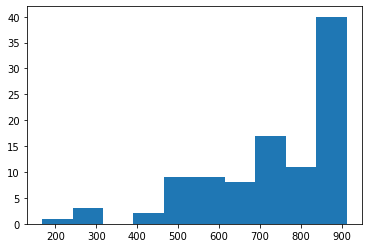

In [16]:
plt.hist(mean_reward)
plt.savefig("mean_reward.png") 

In [9]:
obs = env.reset()
while True:
    action, _states = model.predict(obs.copy())
    obs, rewards, dones, info = env.step(action)
    env.render()
    
env.close()

Track generation: 1045..1310 -> 265-tiles track


KeyboardInterrupt: 